In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem diabetes ou não,
com base em certas medidas diagnósticas incluídas no conjunto de dados

<img src="https://static.tuasaude.com/media/article/dr/nj/diabetes_52276_l.jpg" width="400" height="100"/>

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
df['Outcome'].drop_duplicates()

0    1
1    0
Name: Outcome, dtype: int64

# Separar em Treino e Teste

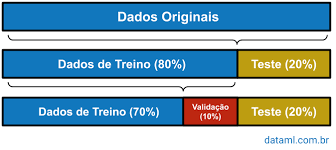

In [30]:
train , test = train_test_split(df,test_size=0.2,random_state=0)

# Retirar colunas que não usaremos

<img src="https://cdn2.iconfinder.com/data/icons/flat-pro-word-processing-set-5/32/table-column-delete-512.png" width="200" height="100"/>

# Valor Vazio

<img src="https://www.logianalytics.com/wp-content/uploads/2019/06/Missing-values-2.png" width="250" height="100"/>

In [31]:
pd.isna(df).sum().to_frame("Valor Vazio")

,Valor Vazio
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Categóricas em numéricas

<img src="https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png" width="300" height="100"/>

# Separar a variável target das features (tanto do treino como do teste)
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [32]:
train_x = train.drop(columns=['Outcome'],axis=1)
train_y = train['Outcome']

In [33]:
test_x = test.drop(columns=['Outcome'],axis=1)
test_y = test['Outcome']

## Treinar o modelo com os principais algorítimos supervisionados de Classificação
<img src="https://i.ibb.co/N3pbLFp/LR-LDA-DT-KNN-SVM-RF.png" width="200" height="80"/>

In [34]:
LR = LogisticRegression(solver='lbfgs', max_iter=10000).fit(train_x, train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
DT = DecisionTreeClassifier().fit(train_x, train_y)
KN = KNeighborsClassifier().fit(train_x, train_y)
SVM = SVC().fit(train_x,train_y)
RF = RandomForestClassifier().fit(train_x,train_y)

## Matriz de confusão + Métricas
<img src="https://www.researchgate.net/profile/Rune-Jacobsen/publication/334840641/figure/fig3/AS:794222751928321@1566368868347/Confusion-matrix-and-evaluation-metrics.png" width="350" height="80"/>

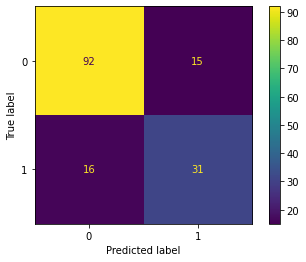

In [35]:
plot_confusion_matrix(RF, test_x, test_y)
plt.show()

In [36]:
metricas = {
        'Accuracy': [LR.score(test_x,test_y),
                 LDA.score(test_x,test_y),
                 DT.score(test_x,test_y),
                 KN.score(test_x,test_y),
                 SVM.score(test_x,test_y),
                 RF.score(test_x,test_y)],
        'Precision': [precision_score(test_y, LR.predict(test_x)),
                      precision_score(test_y, LDA.predict(test_x)),
                      precision_score(test_y, DT.predict(test_x)),
                      precision_score(test_y, KN.predict(test_x)),
                      precision_score(test_y, SVM.predict(test_x)),
                      precision_score(test_y, RF.predict(test_x))],
        'Recall' : [recall_score(test_y, LR.predict(test_x)),
                    recall_score(test_y, LDA.predict(test_x)),
                    recall_score(test_y, DT.predict(test_x)),
                    recall_score(test_y, KN.predict(test_x)),
                    recall_score(test_y, SVM.predict(test_x)),
                    recall_score(test_y, RF.predict(test_x))]
        }

dados = pd.DataFrame(metricas, columns = ['Accuracy', 'Precision','Recall'], index=['LR','LDA','DT','KN','SVM','RF'])

dados

,Accuracy,Precision,Recall
LR,0.824675,0.763158,0.617021
LDA,0.824675,0.763158,0.617021
DT,0.779221,0.632653,0.659574
KN,0.753247,0.591837,0.617021
SVM,0.792208,0.727273,0.510638
RF,0.798701,0.673913,0.659574


## Curva ROC
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Roc-draft-xkcd-style.svg/250px-Roc-draft-xkcd-style.svg.png" width="350" height="80"/>

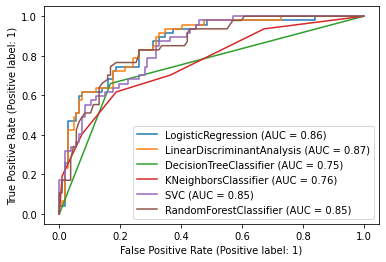

In [37]:
#classifiers = [LR, LDA, DT, KN, SVM, RF]
plot_roc_curve(LR, test_x, test_y, ax=plt.gca())
plot_roc_curve(LDA, test_x, test_y, ax=plt.gca())
plot_roc_curve(DT, test_x, test_y, ax=plt.gca())
plot_roc_curve(KN, test_x, test_y, ax=plt.gca())
plot_roc_curve(SVM, test_x, test_y, ax=plt.gca())
plot_roc_curve(RF, test_x, test_y, ax=plt.gca())